<a href="https://colab.research.google.com/github/ZS4MLDL/learn_pytorch/blob/main/02_classification_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
train_dataset = datasets.FashionMNIST(root="/dataset", train=True,transform=transforms.ToTensor(), download=True)
test_dataset = datasets.FashionMNIST(root="/dataset", train=False, transform=transforms.ToTensor())

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.2MB/s]


Extracting /dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to /dataset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]


Extracting /dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /dataset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.02MB/s]


Extracting /dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /dataset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.54MB/s]

Extracting /dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /dataset/FashionMNIST/raw



In [3]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)


In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, in_dim,n_hidden_1, n_hidden_2, out_dim):
    super().__init__()
    self.layer1 = nn.Sequential(
        nn.Linear(in_dim, n_hidden_1),
        nn.ReLU(True)
    )
    self.layer2 = nn.Sequential(
        nn.Linear(n_hidden_1, n_hidden_2),
        nn.ReLU(True)
    )
    self.layer3 = nn.Sequential(
        nn.Linear(n_hidden_2, out_dim),
        nn.ReLU(True)
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)

    return x

In [ ]:
in_dim = 28 * 28 #784
n_hidden_1 = 200
n_hidden_2 = 200
out_dim = 10


In [ ]:
model = NeuralNetwork(in_dim, n_hidden_1, n_hidden_2, out_dim)

In [ ]:
model.state_dict()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
model = model.to(device)

In [ ]:
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [35]:
num_epochs = 6

for epoch in range(num_epochs):
  print(f"epoch  {epoch + 1}")
  running_loss = 0.0
  running_acc = 0.0

  for i, data in enumerate(train_loader, 1):
    img, label = data
    img = img.view(img.size(0), -1)
    img = img.to(device)
    label = label.to(device)
    out = model(img)
    loss = criterion(out, label)
    running_loss += loss.item()
    _, pred = torch.max(out, 1) #64, 10
    running_acc += (pred==label).float().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 200 ==0 :
      print(f"epoch {epoch +1 }/ {num_epochs}, loss: {running_loss/i:.6f}, acc: {running_acc/i:.6f}")

  print(f"Finish: {epoch + 1} epoch, loss: { running_loss/i:.6f}, acc: {running_acc/i:.6f}")

epoch  1
epoch 1/ 6, loss: 1.912991, acc: 0.398672
epoch 1/ 6, loss: 1.906228, acc: 0.397891
epoch 1/ 6, loss: 1.899793, acc: 0.398151
epoch 1/ 6, loss: 1.889216, acc: 0.400078
Finish: 1 epoch, loss: 1.884841, acc: 0.400220
epoch  2
epoch 2/ 6, loss: 1.837943, acc: 0.415859
epoch 2/ 6, loss: 1.835027, acc: 0.415508
epoch 2/ 6, loss: 1.827897, acc: 0.416719
epoch 2/ 6, loss: 1.820878, acc: 0.418965
Finish: 2 epoch, loss: 1.813311, acc: 0.420376
epoch  3
epoch 3/ 6, loss: 1.761600, acc: 0.428672
epoch 3/ 6, loss: 1.745158, acc: 0.440430
epoch 3/ 6, loss: 1.736327, acc: 0.454036
epoch 3/ 6, loss: 1.725652, acc: 0.464023
Finish: 3 epoch, loss: 1.719169, acc: 0.471249
epoch  4
epoch 4/ 6, loss: 1.684205, acc: 0.511953
epoch 4/ 6, loss: 1.667904, acc: 0.520781
epoch 4/ 6, loss: 1.660998, acc: 0.523021
epoch 4/ 6, loss: 1.652036, acc: 0.523184
Finish: 4 epoch, loss: 1.642937, acc: 0.525970
epoch  5
epoch 5/ 6, loss: 1.605267, acc: 0.534297
epoch 5/ 6, loss: 1.598586, acc: 0.537891
epoch 5/ 6,

In [40]:
model.eval()
eval_loss = 0.0
eval_acc = 0.0

for data in test_loader:
  img, label = data
  img = img.view(img.size(0), -1)
  img = img.to(device)
  label = label.to(device)

  with torch.no_grad():
    out = model(img)
    loss = criterion(out, label)
    eval_loss += loss.item()
    _, pred = torch.max(out, 1)
    eval_acc += (pred==label).float().mean()

print(f"Test Loss: {eval_loss/len(test_loader)}, acc: {eval_acc/len(test_loader)}")

Test Loss: 1.519580115937883, acc: 0.5425955653190613


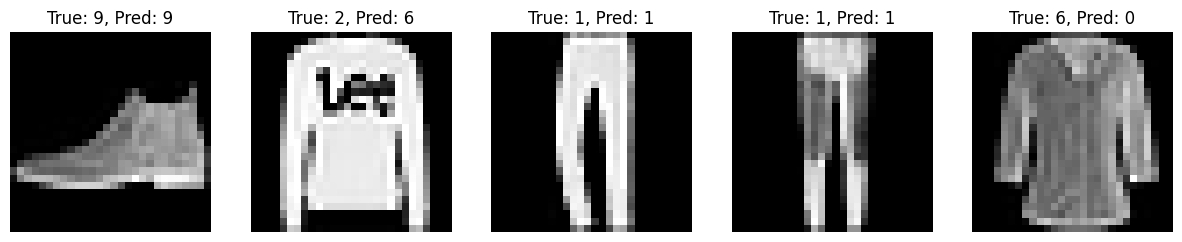

In [46]:
images, labels = next(iter(test_loader))
images = images.reshape(-1, 28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_, pred = torch.max(outputs, 1)
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
  ax[i].imshow(images[i].reshape(28, 28).cpu(), cmap='gray')
  ax[i].set_title(f"True: {labels[i].item()}, Pred: {pred[i].item()}")
  ax[i].axis('off')

plt.show()


In [47]:
torch.save(model.state_dict(),'./NeuralNetwork.pth')